> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [TMDb movie Data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

In this data set we want to analise the rating and revenue of 10,000 movies collected from Movie Database (TMDb)


### Question(s) for Analysis

    1. What year is movies release most?
    2. Which month has the highest number of movie release in the years?
    3. Which genre are most popular from year to year?
    4. Which genre has the highest movie release?
    5. What property are sinonimous with movies that have high revenue
    
    

In [113]:
# Loading library important to our analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [114]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

### Loading the data set into the notebook to view its shape and headings 

In [115]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [116]:
# To investigate the shape of the dataset
df.shape

(10866, 21)

In [117]:
# Investigating misisng rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [118]:
# summarry statistics of the Data set
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [119]:
# Checking if we have duplicates
df.duplicated().sum()

1

In [120]:
# Viewing the duplicated value
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### Removing the duplicate row.

In [121]:
# Delete duplicate rows to keep first row
df.drop_duplicates(keep="first", inplace = True)

#### Verifying the deleted row

In [122]:
# Verifying the deleted row
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj



### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).


#### We have been able to observe that the data set contain more than 10,000 rows and 21 columns. we also noted that we have a considerable amout of missing data from production_companies, keyword, tagline, homepage etc And we have drop the duplicated row for the dataset.

#### we need to drop the columns that will we not be using in the dataset 

In [123]:
# Checking the number of missing values we have in our Dataset
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

### We are droping columns with higher number of missing value 
And also columns that are irrelevant to our analysis

In [124]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Droping irrelevant columns from the dataset 
df.drop(['id', 'imdb_id', 'homepage', 'keywords', 'tagline', 'production_companies'], inplace=True, axis =1)

In [125]:
#checking the head agian
df.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
overview          10861 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.3+ MB


#### Changing the date time format from object to datetime

In [127]:
df['release_date']=pd.to_datetime(df['release_date'])
df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [128]:
df.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 15 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
cast              10789 non-null object
director          10821 non-null object
overview          10861 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 1.3+ MB


In [130]:
df.shape

(10865, 15)

#### We have considirable amount of missing value. We want to check each number number of missing value we have in our Dataset

In [131]:
df.isnull().sum()

popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

### We are droping number of missing rows or NAN

In [132]:
df.dropna(inplace = True)

In [133]:
df.shape

(10729, 15)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10729 entries, 0 to 10865
Data columns (total 15 columns):
popularity        10729 non-null float64
budget            10729 non-null int64
revenue           10729 non-null int64
original_title    10729 non-null object
cast              10729 non-null object
director          10729 non-null object
overview          10729 non-null object
runtime           10729 non-null int64
genres            10729 non-null object
release_date      10729 non-null datetime64[ns]
vote_count        10729 non-null int64
vote_average      10729 non-null float64
release_year      10729 non-null int64
budget_adj        10729 non-null float64
revenue_adj       10729 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 1.3+ MB


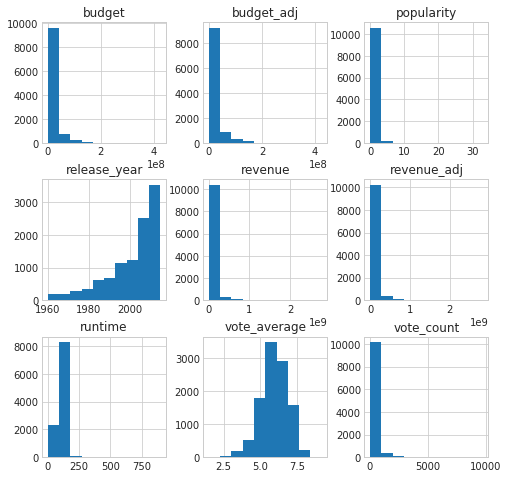

In [135]:

#Ploting Histogram of the whole data frame
df.hist(figsize = (8,8));

In [136]:
df.tail()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,2066-06-15,11,7.4,1966,0.000000,0.0
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,2066-12-21,20,5.7,1966,0.000000,0.0
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,2066-01-01,11,6.5,1966,0.000000,0.0
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,2066-11-02,22,5.4,1966,0.000000,0.0
10865,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,Harold P. Warren,A family gets lost on the road and stumbles up...,74,Horror,2066-11-15,15,1.5,1966,127642.279154,0.0


## We have some data with no revenue and budget
### We are removing them from our data set

In [137]:
# Removing data with no revenue and budget
no_rev_bud = df[(df['budget_adj'] == 0)|(df['revenue_adj'] == 0)|(df['runtime'] == 0)]
df.drop(no_rev_bud.index, inplace=True)
df.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 10848
Data columns (total 15 columns):
popularity        3849 non-null float64
budget            3849 non-null int64
revenue           3849 non-null int64
original_title    3849 non-null object
cast              3849 non-null object
director          3849 non-null object
overview          3849 non-null object
runtime           3849 non-null int64
genres            3849 non-null object
release_date      3849 non-null datetime64[ns]
vote_count        3849 non-null int64
vote_average      3849 non-null float64
release_year      3849 non-null int64
budget_adj        3849 non-null float64
revenue_adj       3849 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 481.1+ KB


In [139]:
df.shape

(3849, 15)

In [140]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3849.000000,3.849000e+03,3.849000e+03,3849.000000,3849.000000,3849.000000,3849.000000,3.849000e+03,3.849000e+03
mean,1.192933,3.724886e+07,1.078148e+08,109.217459,528.387114,6.168693,2001.258249,4.429360e+07,1.372313e+08
std,1.475622,4.221699e+07,1.766175e+08,19.914141,880.333629,0.794697,11.285642,4.481360e+07,2.162018e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.463337,1.000000e+07,1.367069e+07,95.000000,71.000000,5.700000,1995.000000,1.316623e+07,1.843023e+07
50%,0.798582,2.400000e+07,4.490726e+07,106.000000,205.000000,6.200000,2004.000000,3.005030e+07,6.181393e+07
75%,1.374300,5.000000e+07,1.243052e+08,119.000000,581.000000,6.700000,2010.000000,6.076720e+07,1.634115e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [141]:
df['cast'].head()

0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...
2    Shailene Woodley|Theo James|Kate Winslet|Ansel...
3    Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...
4    Vin Diesel|Paul Walker|Jason Statham|Michelle ...
Name: cast, dtype: object

In [142]:
df['genres'].head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (What year is movies release most ?)

In [143]:
#Year with the most movie release
year_r=df.groupby('release_year').count()

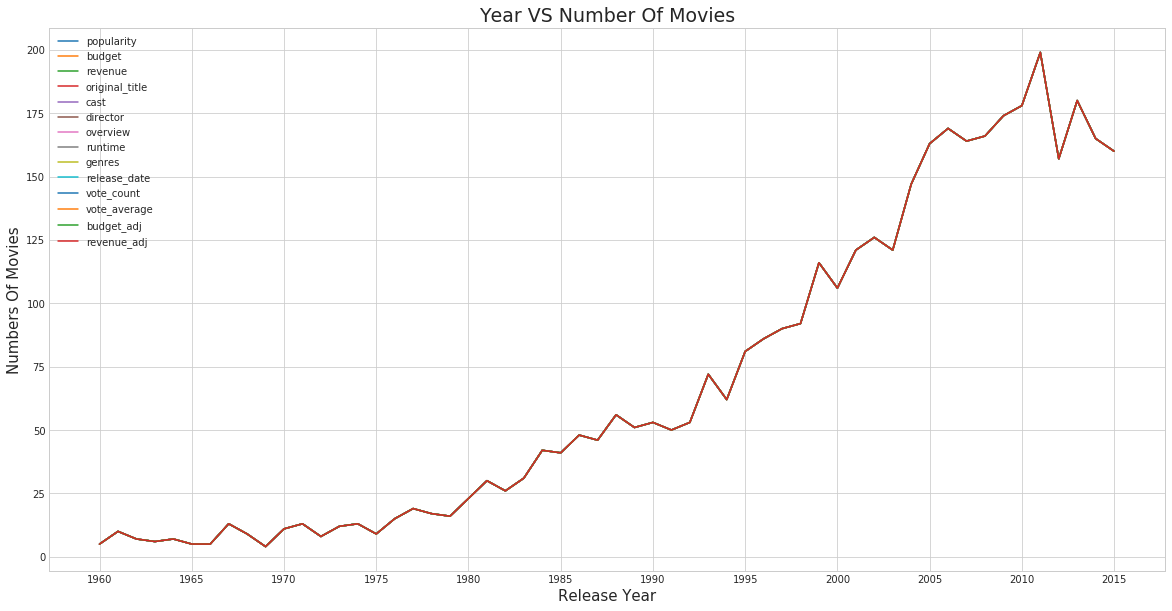

In [144]:
# Plot of Year vs number of movies 
df.groupby('release_year').count().plot(xticks = np.arange(1960,2016,5), figsize=(20, 10))
plt.xlabel('Release Year',fontsize = 15)
plt.ylabel('Numbers Of Movies',fontsize = 15)
plt.title("Year VS Number Of Movies",fontsize = 19)
plt.grid(True)
plt.savefig('release_year')
plt.show()

##### We can see from the chart that 2011 as the highest number of movie release follow by year 2013

### Research Question 2 (Which month has the highest number of movie release in the years )

In [145]:
# Count of the Revenues_Adl
rev_adj = df.groupby('revenue').count()

In [146]:
# Numbers of movies release 
number_of_release_movie = df['release_date'].dt.month.value_counts().sort_index()

number_of_release_movie

1     225
2     257
3     279
4     266
5     291
6     340
7     314
8     337
9     459
10    363
11    303
12    415
Name: release_date, dtype: int64

In [147]:
# Loading Number of release movie and month into Dataframe
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release_movie = pd.DataFrame(number_of_release_movie)
number_of_release_movie['month'] = months

#Re-naming the column of the new dataframe
number_of_release_movie.rename(columns = {'release_date':'number_of_release_movie'},inplace=True)


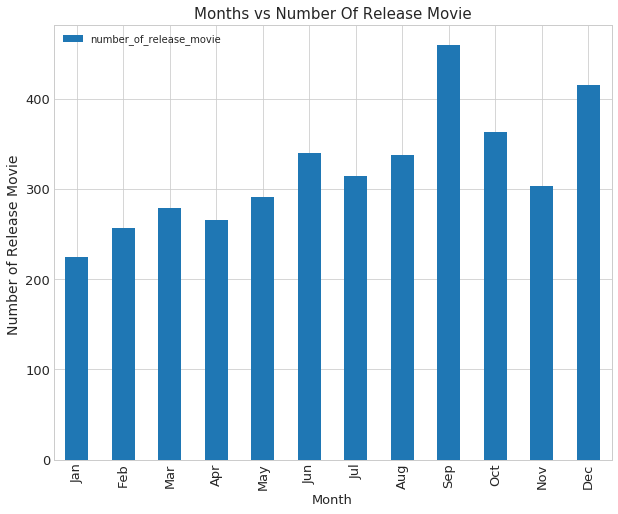

In [148]:
# Ploting a bar chart of thier distribution
number_of_release_movie.plot(x='month',kind='bar',fontsize = 13,figsize=(10,8))
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of Release Movie ',fontsize = 14)
plt.title('Months vs Number Of Release Movie',fontsize = 15)
plt.grid(True)
plt.show()

#### We see from the chart that the highest number of movie produce are in september.

### Research Question 3 (Which genre are most popular from year to year!)

##### After observation of the genre colunm and through the help of the overview  note provided for us, we notice that the genre colunm have more than one genre and if we choose one genre from each movie our analysis will be biased.

### Let take a look at the popularity metric pictorially 

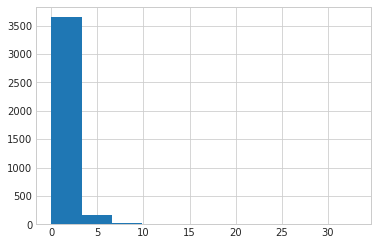

In [149]:
# Popularity Histogram
df.popularity.hist();

#### We notice from the diagram that major popularity falls between 0 and 2.5

In [150]:
df['popularity'].describe()

count    3849.000000
mean        1.192933
std         1.475622
min         0.001117
25%         0.463337
50%         0.798582
75%         1.374300
max        32.985763
Name: popularity, dtype: float64

##### From the summary statistics. We can see that the movies that have popularity greater than one are consider to be popular. As observer above we notice that we have five different combination of the genre movies and it's at the highest popularity of 32.98 

#### We will like to tidy up the genres column by splitting it so that we can perform calculation on each one of them 

In [151]:
df['genres'] = df['genres'].str.split('|', expand = True) 

In [152]:
df['genres'].head()

0       Action
1       Action
2    Adventure
3       Action
4       Action
Name: genres, dtype: object

In [153]:
display(df['genres'].value_counts().nlargest(5))

Drama        889
Comedy       787
Action       689
Adventure    314
Horror       275
Name: genres, dtype: int64

In [154]:
# Splitting the years in to bins of decades (i.e 10 years)
bins_year=[1960, 1970, 1980, 1990, 2000, 2010, 2015]
bins_names=['1960s', '1970s', '1980s', '1990s', '2000s', '2010s']
df.release_year = pd.cut(df.release_year, bins_year, labels = bins_names)

In [155]:
df.release_year.value_counts()

2000s    1529
2010s     861
1990s     808
1980s     424
1970s     145
1960s      77
Name: release_year, dtype: int64

In [156]:
df.groupby(['release_year', 'genres'])['popularity'].size().unstack().fillna(0)

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,
1960s,12.0,15.0,1.0,10.0,6.0,0.0,18.0,1.0,0.0,2.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0
1970s,28.0,15.0,2.0,18.0,12.0,0.0,34.0,1.0,2.0,0.0,18.0,2.0,2.0,1.0,7.0,0.0,2.0,0.0,1.0
1980s,73.0,51.0,5.0,83.0,17.0,2.0,71.0,4.0,21.0,0.0,52.0,4.0,1.0,4.0,20.0,0.0,13.0,3.0,0.0
1990s,159.0,53.0,16.0,174.0,43.0,2.0,184.0,7.0,29.0,4.0,52.0,5.0,9.0,19.0,18.0,1.0,31.0,1.0,1.0
2000s,269.0,128.0,44.0,351.0,57.0,19.0,368.0,16.0,40.0,4.0,94.0,9.0,15.0,23.0,25.0,0.0,53.0,7.0,7.0
2010s,146.0,52.0,35.0,149.0,36.0,5.0,213.0,11.0,18.0,7.0,56.0,7.0,8.0,19.0,27.0,0.0,61.0,8.0,3.0


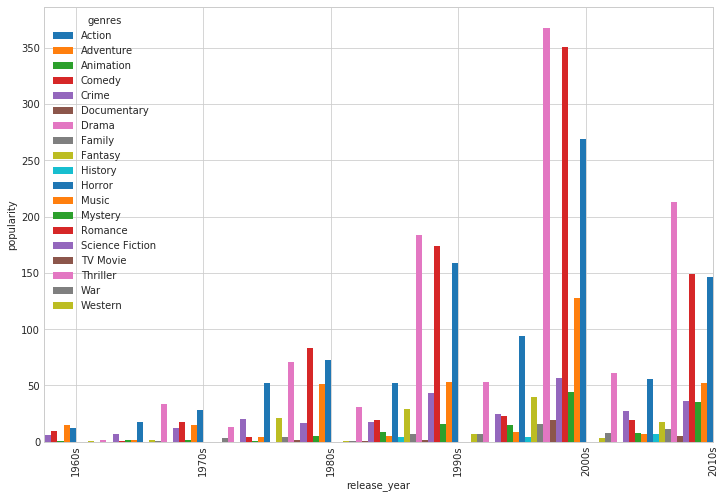

In [157]:
# Chart of genres as regards to year and popularity
fig, ax = plt.subplots(figsize=(12,8))
df.groupby(["release_year","genres"])['popularity'].size().unstack().plot(kind='bar',ax=ax,width=-.9,align='edge');
ax.set_ylabel('popularity')
plt.grid(True)
plt.show();

This graph shows us that most popular genres differ according to decades for 
example:
    
    i.  in 1960s Adventure appear to be most popular
    ii.  in 1970s Thrillers appear to be most popular
    iii. in 1980s Comedy appears to be most popular
    iv.  in 1990s Thrillers etc


### Research Question 4 (Which genres as the highest movie release?)

In [158]:
# Funtion to count each genres 
def data(x):
    df['genres']
    data_i = df.genres.value_counts(ascending=False)
    return data_i

In [159]:
# Number of each genres movies
genres_movies = data('genres')
print(genres_movies)

Drama              889
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Music               29
Documentary         28
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64


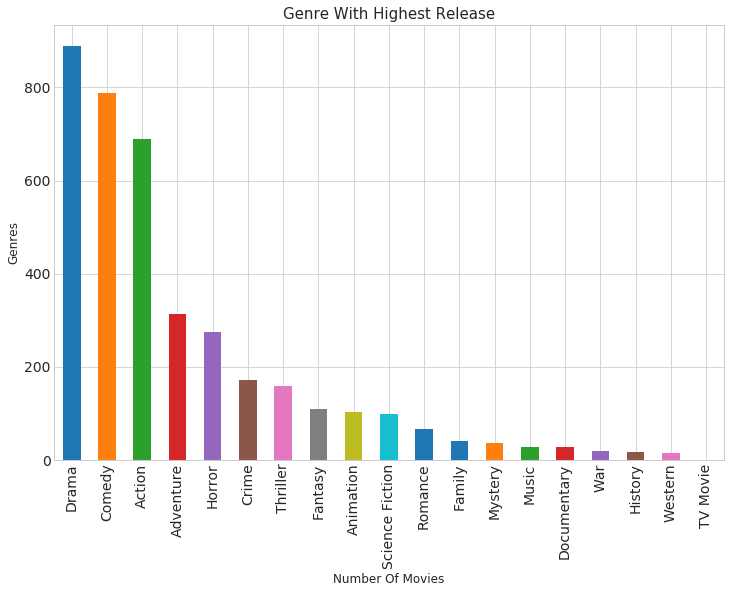

In [161]:
#Chart showing 'genre vs number of movies'.
genres_movies.plot(kind= 'bar',figsize = (12,8),fontsize=14)
#setup the title and the labels of the plot.
plt.xlabel('Number Of Movies',fontsize=12)
plt.ylabel("Genres",fontsize= 12)
plt.title("Genre With Highest Release",fontsize=15)
plt.grid(True)
plt.show()

#### From the plot we can  see that drama genre as the highest number of movie release, 889.

### Research Question 5 (What property are sinonimous with movies that have high revenue)

In [162]:
# checking our budget columns
df['budget'].describe()

count    3.849000e+03
mean     3.724886e+07
std      4.221699e+07
min      1.000000e+00
25%      1.000000e+07
50%      2.400000e+07
75%      5.000000e+07
max      4.250000e+08
Name: budget, dtype: float64

#### Let take a look at the net profit. As we know that Net Profit = Total Revenue - Total Expenses

In [163]:
# Calculating the Net Profit
df['net_profit'] = df['revenue'] - df['budget_adj']

In [164]:
# Extrating records when budget is greater than zero which also the movies revenue
mov_rev = df[df['budget'] > 0]

In [165]:
mov_rev.head()

,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,net_profit
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action,2015-06-09,5562,6.5,2010s,1.379999e+08,1.392446e+09,1.375529e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action,2015-05-13,6185,7.1,2010s,1.379999e+08,3.481613e+08,2.404364e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure,2015-03-18,2480,6.3,2010s,1.012000e+08,2.716190e+08,1.940382e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action,2015-12-15,5292,7.5,2010s,1.839999e+08,1.902723e+09,1.884178e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action,2015-04-01,2947,7.3,2010s,1.747999e+08,1.385749e+09,1.331449e+09


In [166]:
mov_rev.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj,net_profit
popularity,1.000000,0.446563,0.615348,0.215510,0.779986,0.317750,0.398848,0.546716,0.601445
budget,0.446563,1.000000,0.688403,0.261489,0.556681,0.023638,0.958485,0.533221,0.520796
revenue,0.615348,0.688403,1.000000,0.250728,0.754466,0.227071,0.657396,0.900840,0.974667
runtime,0.215510,0.261489,0.250728,1.000000,0.274215,0.352615,0.334660,0.280978,0.193968
vote_count,0.779986,0.556681,0.754466,0.274215,1.000000,0.387262,0.497657,0.654534,0.734856
vote_average,0.317750,0.023638,0.227071,0.352615,0.387262,1.000000,0.036204,0.266806,0.254880
budget_adj,0.398848,0.958485,0.657396,0.334660,0.497657,0.036204,1.000000,0.570187,0.472203
revenue_adj,0.546716,0.533221,0.900840,0.280978,0.654534,0.266806,0.570187,1.000000,0.884555
net_profit,0.601445,0.520796,0.974667,0.193968,0.734856,0.254880,0.472203,0.884555,1.000000


In [167]:
# Finding the Aggregate of the movie revenue
mov_rev = mov_rev.groupby('genres', as_index=False).agg(
    {'budget':'sum',
     'revenue':'sum',
    'net_profit':'sum',
    'popularity':'mean'}
)

In [168]:
mov_rev

,genres,budget,revenue,net_profit,popularity
0,Action,35652739125,93654873325,5.158783e+10,1.442326
1,Adventure,22708820200,71852343861,4.479819e+10,1.905525
2,Animation,8241200000,28441594648,1.964417e+10,1.712723
3,Comedy,20633817030,62011581729,3.757171e+10,0.914765
4,Crime,4437899472,12206416011,6.768389e+09,1.074895
5,Documentary,134848148,652807270,5.058025e+08,0.312846
6,Drama,21946009781,57627537910,3.014444e+10,0.928449
7,Family,2415000000,8701487612,6.003537e+09,1.609295
8,Fantasy,6096050011,17555295357,1.050971e+10,1.581660
9,History,600619005,1931446332,1.082515e+09,1.442235


In [169]:
# Sorting by revenue
mov_rev = mov_rev.sort_values(by='revenue', ascending=False)

In [170]:
mov_rev

,genres,budget,revenue,net_profit,popularity
0,Action,35652739125,93654873325,5.158783e+10,1.442326
1,Adventure,22708820200,71852343861,4.479819e+10,1.905525
3,Comedy,20633817030,62011581729,3.757171e+10,0.914765
6,Drama,21946009781,57627537910,3.014444e+10,0.928449
2,Animation,8241200000,28441594648,1.964417e+10,1.712723
8,Fantasy,6096050011,17555295357,1.050971e+10,1.581660
14,Science Fiction,5174107013,17038789305,1.091307e+10,1.931437
10,Horror,4194800006,15145576899,9.793452e+09,0.855787
16,Thriller,5372716720,12609056746,6.563586e+09,1.171430
4,Crime,4437899472,12206416011,6.768389e+09,1.074895


#### The records seems to be on high side so we want to convert them to  billion unit

In [171]:
# Converting the budget into billion unit
mov_rev['budget'] = mov_rev['budget']/1e9

In [172]:
# Converting net profit into billion unit
mov_rev['net_profit'] = mov_rev['net_profit']/1e9 

In [173]:
# Converting revenue into billion unit
mov_rev['revenue'] = mov_rev['revenue']/1e9

In [174]:
mov_rev

,genres,budget,revenue,net_profit,popularity
0,Action,35.652739,93.654873,51.587834,1.442326
1,Adventure,22.708820,71.852344,44.798190,1.905525
3,Comedy,20.633817,62.011582,37.571714,0.914765
6,Drama,21.946010,57.627538,30.144438,0.928449
2,Animation,8.241200,28.441595,19.644168,1.712723
8,Fantasy,6.096050,17.555295,10.509708,1.581660
14,Science Fiction,5.174107,17.038789,10.913065,1.931437
10,Horror,4.194800,15.145577,9.793452,0.855787
16,Thriller,5.372717,12.609057,6.563586,1.171430
4,Crime,4.437899,12.206416,6.768389,1.074895


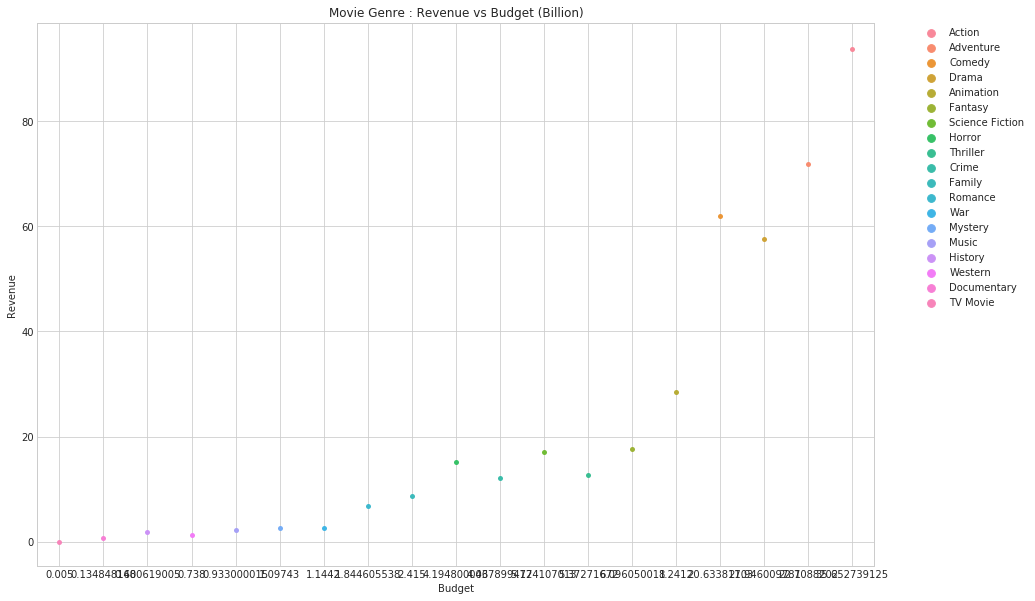

In [175]:
# Plotting scatter plot
plt.figure(figsize = (15, 10))
sns.set_style("whitegrid")
sns.stripplot(x='budget', y='revenue', hue='genres', data = mov_rev)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.1)
# set title
plt.title('Movie Genre : Revenue vs Budget (Billion)')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

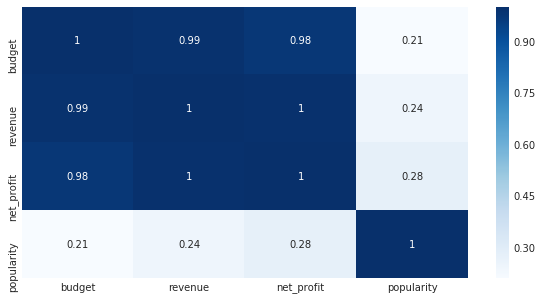

In [177]:
plt.figure(figsize=(10,5))
c=mov_rev.corr()
sns.heatmap(c, cmap='Blues', annot = True)
plt.grid(True)
plt.show()

#### We have a very strong positive correlation between budget and revenue, 0.99 and as well as the Net profit and budget, 0.98

### This is an indication that Genres have higher revenue associated with a higher budget and higher net profits

<a id='conclusions'></a>
## Conclusions
 
 ### The result of our data sudgest:

              1. That the highest number of movies was release in the year 2011 follow by 2013
              2. That the highest number of movies where released in september
              3. The most popular genres differs accoding to their decades  and drama genres has the highest number 
              4. That the movies with high revenues comes with higher budget, higher popularity and higher net profit.
And we can conclude that if the production firms are willing to invest more money in the popular movies genre, based on the data we have the higher budget will allow for the production of high quality movies which will generate higher revenue and net profit. As we can see that the return of investment in the top five.


> **Limitation**: Their are couple of limitation in our data:

         1. Most of the data set contain incomplete record which may affect the accuracy of our analysis.
         2. Most of the columns are irrelevant to our analysis
         3. In the data set i could not find any reasonable correlation between budget and popularity.

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [178]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0